# VIDEO GAME SALES DATASET 🎮

# Preparation

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Analysis & Visualisation

# Let's Start

1. Top Selling Games: What are the top 10 best-selling games of all time based on global sales?

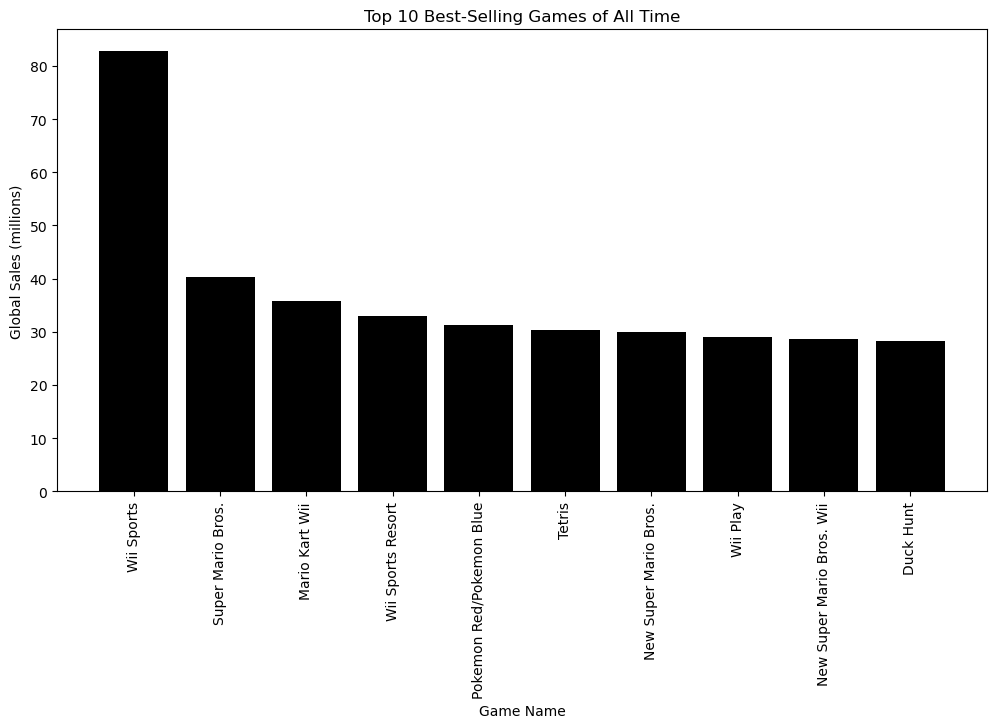

In [13]:
# Sort the dataset by 'Global_Sales' in descending order and select the top 10
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a bar chart to visualize the global sales of top 10 games
plt.figure(figsize=(12, 6))
plt.bar(top_10_games['Name'], top_10_games['Global_Sales'], color='black')
plt.xlabel('Game Name')
plt.ylabel('Global Sales (millions)')
plt.title('Top 10 Best-Selling Games of All Time')
plt.xticks(rotation=90)
plt.show()

2.Sales by Platform: Which gaming platform (e.g., PC, PS4, Xbox, etc.) has the highest total sales?

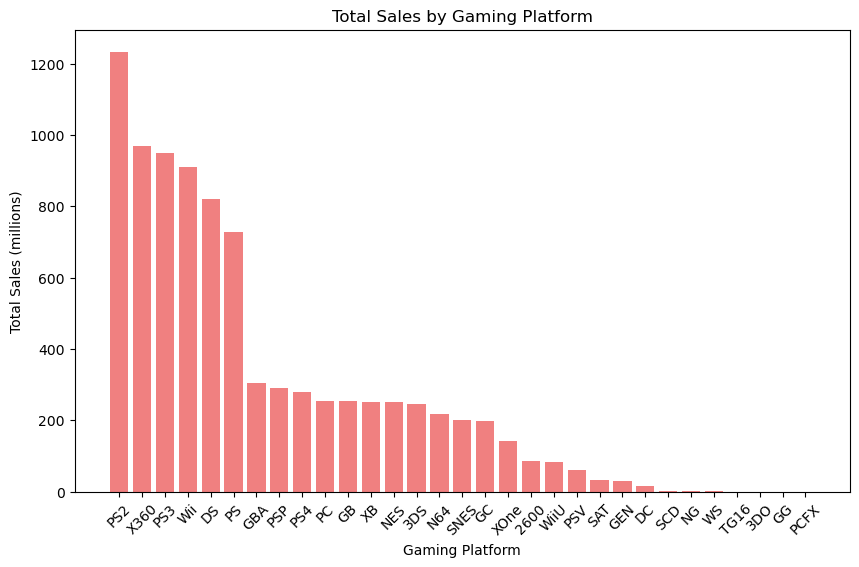

In [14]:
# Group the data by 'Platform' and calculate the sum of global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the platforms based on total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar chart to visualize total sales by platform
plt.figure(figsize=(10, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'], color='lightcoral')
plt.xlabel('Gaming Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Gaming Platform')
plt.xticks(rotation=45)
plt.show()

3.Genre Popularity: What are the most popular genres of video games in terms of global sales?

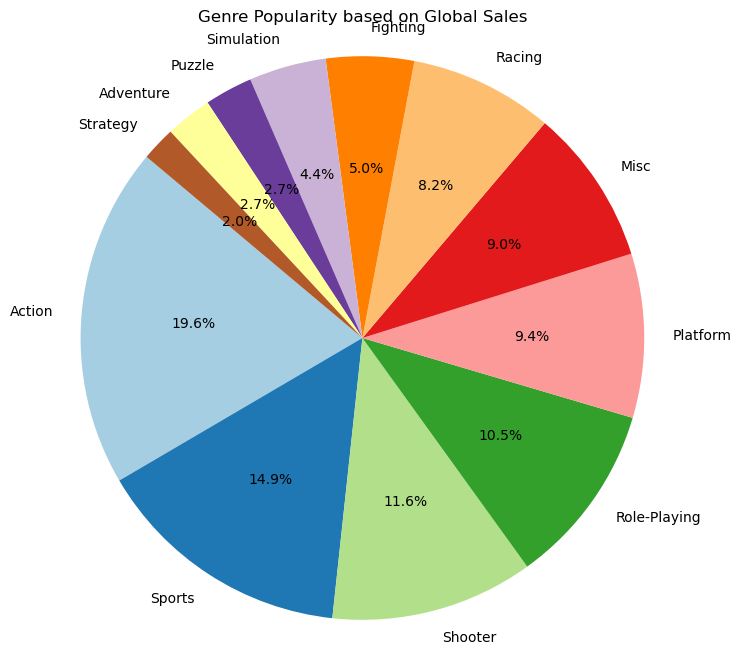

In [15]:
# Group the data by 'Genre' and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the genres based on total sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Create a pie chart to visualize genre popularity
plt.figure(figsize=(8, 8))
plt.pie(genre_sales['Global_Sales'], labels=genre_sales['Genre'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Genre Popularity based on Global Sales')
plt.show()

4.Sales by Region: Which region (North America, Europe, Japan, Rest of the World) contributes the most to global video game sales?

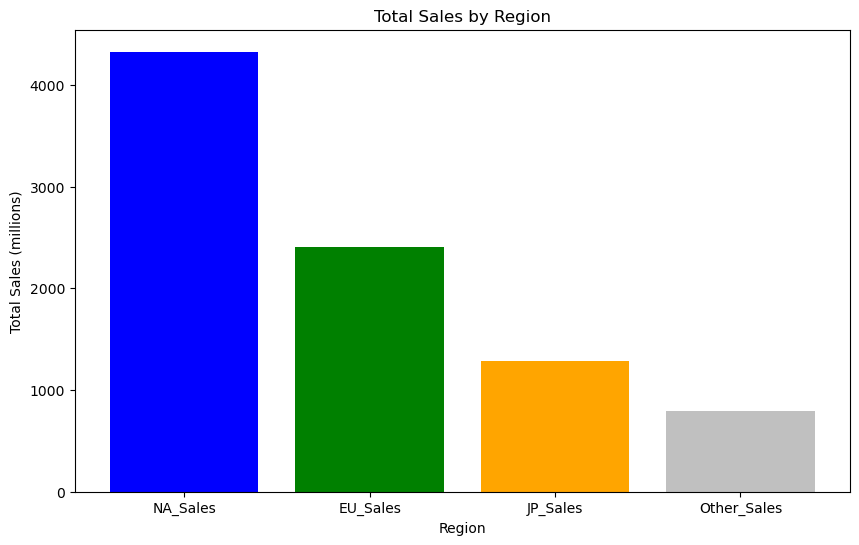

In [17]:
# Calculate the total sales for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create a stacked bar chart to visualize sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values, color=['blue', 'green', 'orange', 'silver'])
plt.xlabel('Region')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Region')
plt.show()

5.Publisher Performance: Which publishers have released the most successful games in terms of global sales?

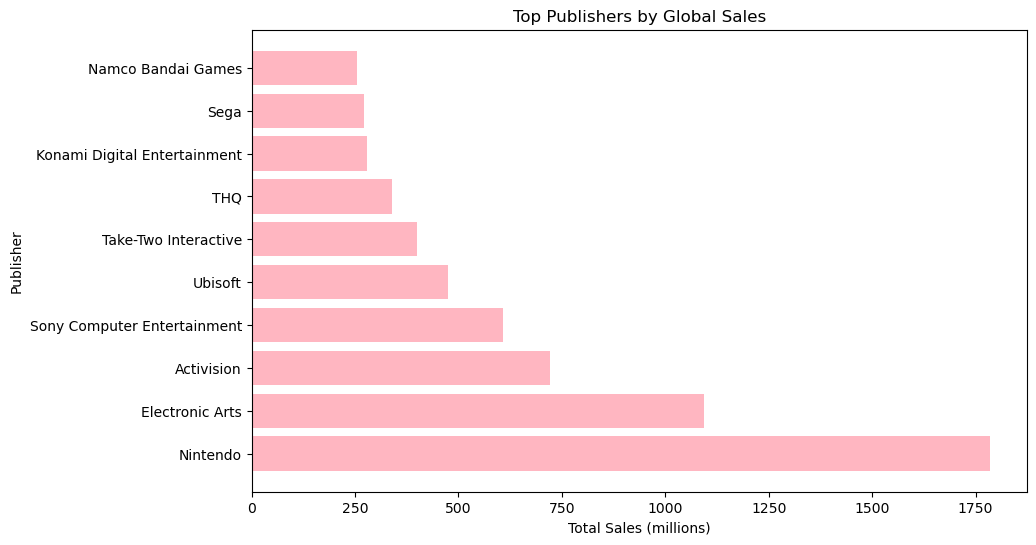

In [18]:
# Group the data by 'Publisher' and calculate the sum of global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()

# Sort the publishers based on total sales in descending order
publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a horizontal bar chart to visualize publisher performance
plt.figure(figsize=(10, 6))
plt.barh(publisher_sales['Publisher'], publisher_sales['Global_Sales'], color='lightpink')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')
plt.show()

6.Yearly Sales Trends: How have video game sales evolved over the years? Are they increasing or decreasing

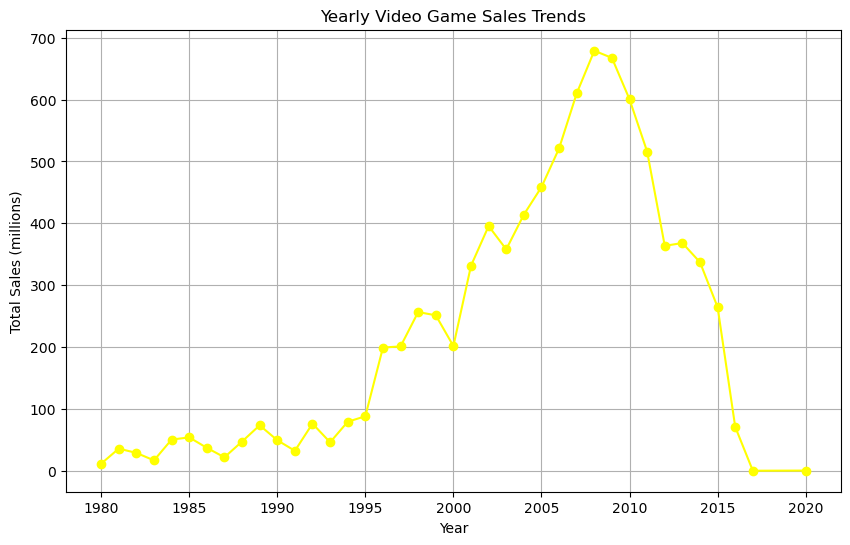

In [19]:
# Group the data by 'Year' and calculate the sum of global sales for each year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a line chart to visualize the yearly sales trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='yellow')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Yearly Video Game Sales Trends')
plt.grid(True)
plt.show()

7.Platform vs. Genre: Which genres are most popular on specific gaming platforms?

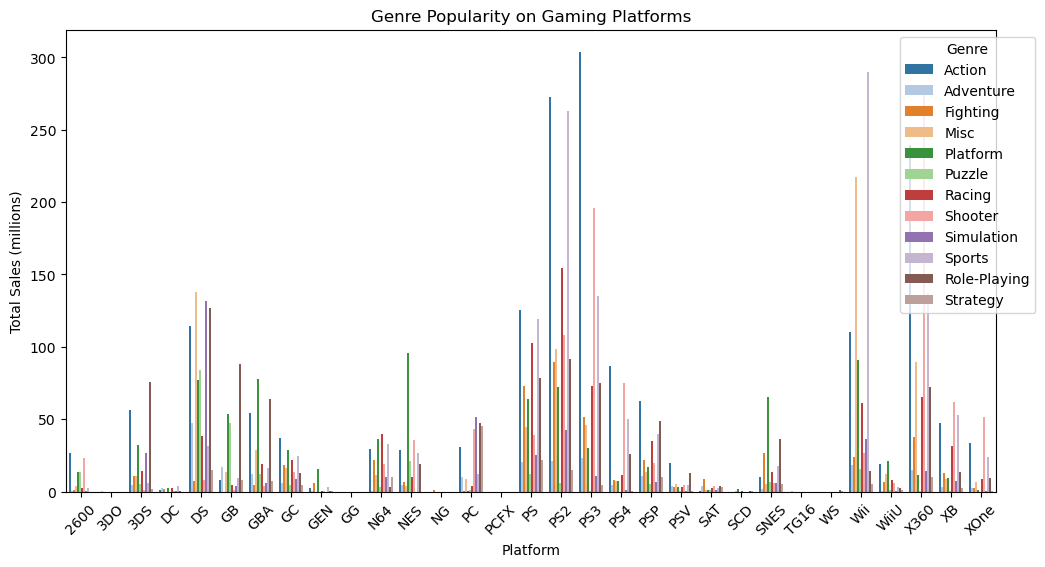

In [21]:
# Group the data by 'Platform' and 'Genre' and calculate the sum of global sales for each combination
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Create a grouped bar chart to visualize genre popularity on gaming platforms
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=platform_genre_sales, palette='tab20')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Genre Popularity on Gaming Platforms')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.xticks(rotation=45)
plt.show()

8.Regional Sales Variation: Do certain genres or platforms perform better in specific regions?

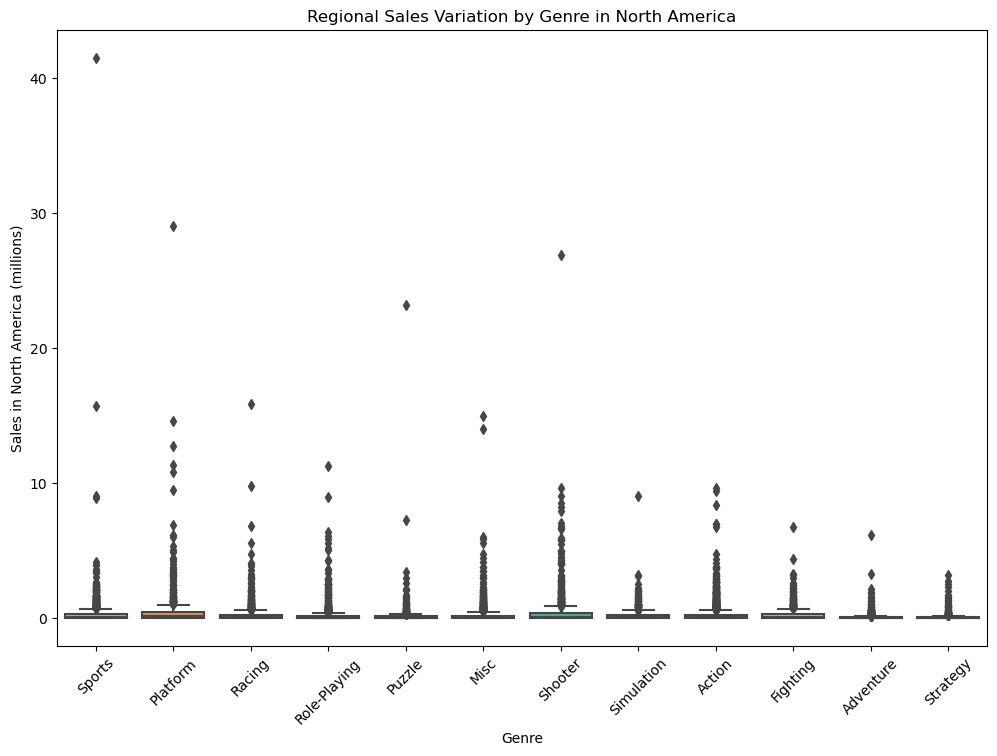

In [22]:
# Create box plots to visualize sales variation of genres and platforms in specific regions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='NA_Sales', data=df)
plt.xlabel('Genre')
plt.ylabel('Sales in North America (millions)')
plt.title('Regional Sales Variation by Genre in North America')
plt.xticks(rotation=45)
plt.show()

9.Correlations: Are there any significant correlations between game sales and other factors like year of release, genre, or publisher?

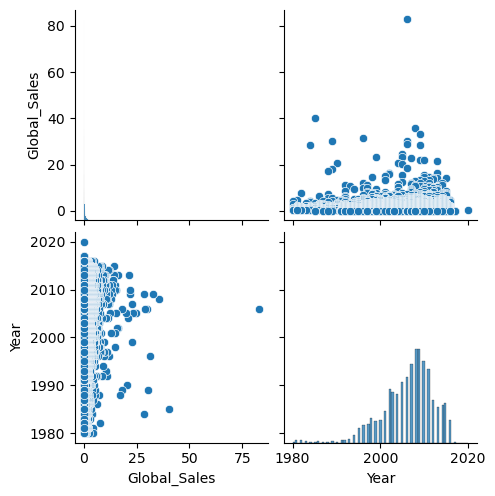

In [23]:
# Create a pairplot to visualize correlations between game sales, year of release, and publisher
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

10.Distribution of Sales: What is the distribution of global sales across different games? Are sales concentrated in a few blockbuster titles, or is it more evenly spread?

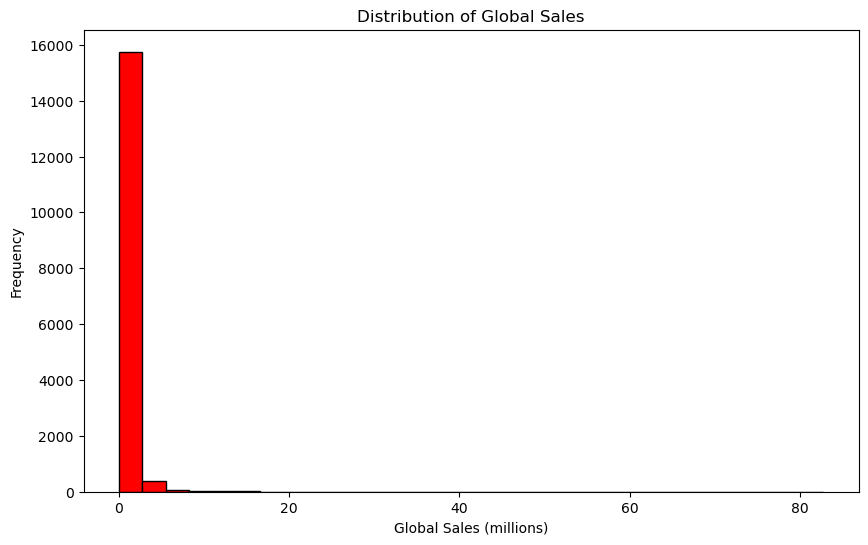

In [25]:
# Create a histogram to visualize the distribution of global sales
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=30, color='red', edgecolor='black')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Sales')
plt.show()

11.Sales Over Time: Can you identify any trends in sales for specific games or genres over time?

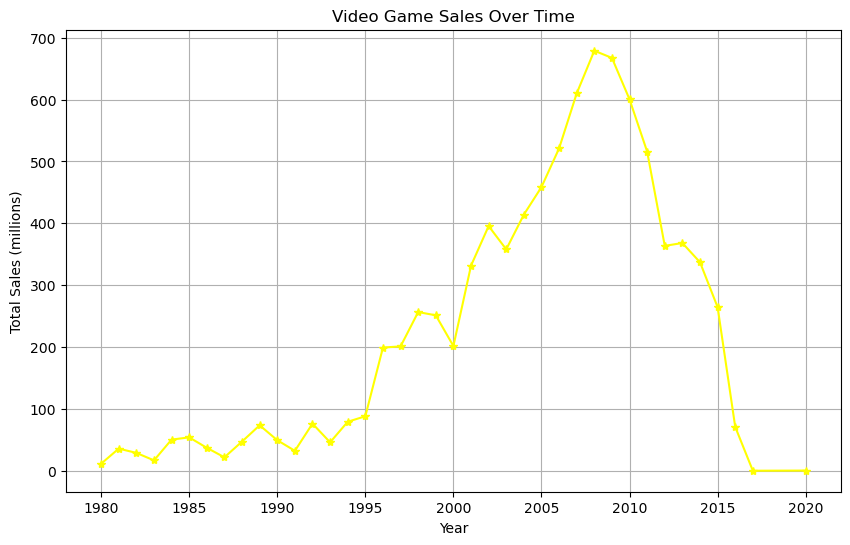

In [28]:
# Group the data by 'Year' and calculate the sum of global sales for each year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a line plot to visualize the sales over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='*', color='yellow')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Video Game Sales Over Time')
plt.grid(True)
plt.show()

12.Best-Selling Genres by Region: Are there any differences in the most popular genres for each region (NA, EU, JP)?

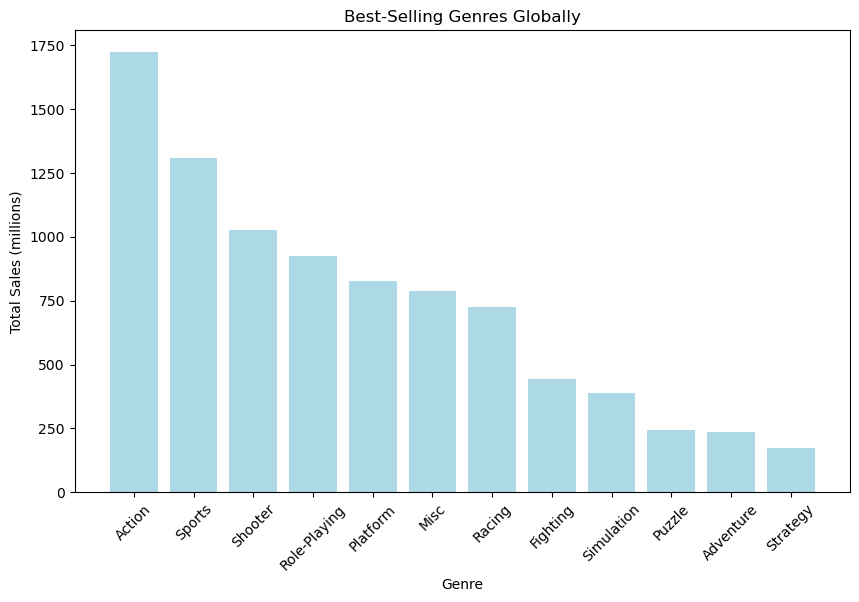

In [35]:
# Group the data by 'Genre' and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Sort the genres based on total sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Create a bar chart to visualize the best-selling genres globally
plt.figure(figsize=(10, 6))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'], color='lightblue')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.title('Best-Selling Genres Globally')
plt.xticks(rotation=45)
plt.show()

13.Yearly Sales by Region: How have the sales trends evolved over the years in each region?

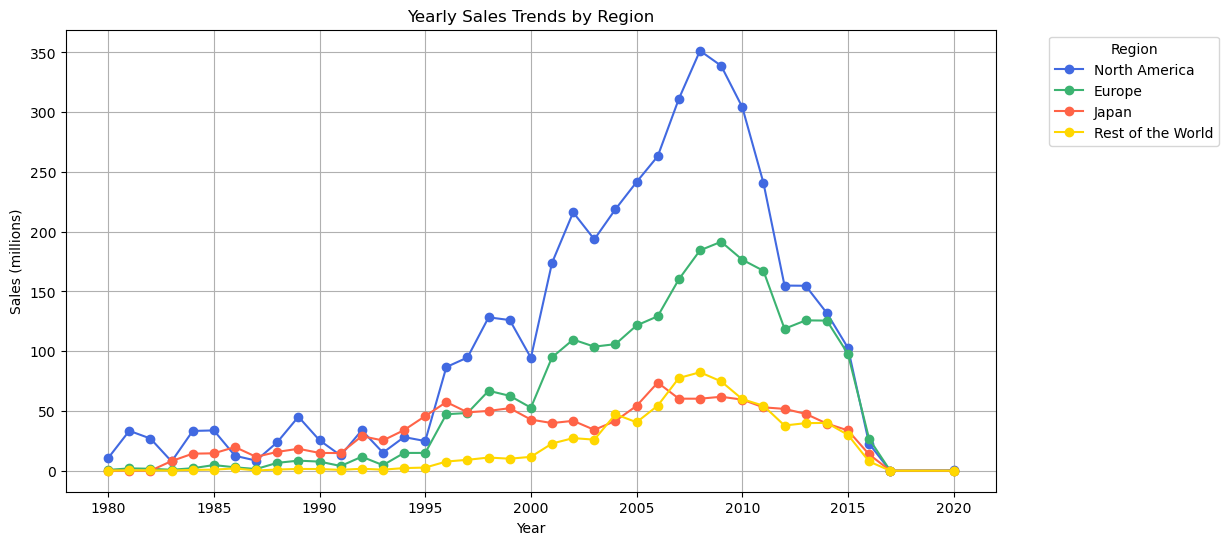

In [36]:
# Group the data by 'Year' and calculate the sum of sales for each region for every year
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'], label='North America', marker='o', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'], label='Europe', marker='o', color='mediumseagreen')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'], label='Japan', marker='o', color='tomato')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'], label='Rest of the World', marker='o', color='gold')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

14.Regional Market Share: What percentage of the global video game market do each of the regions hold?

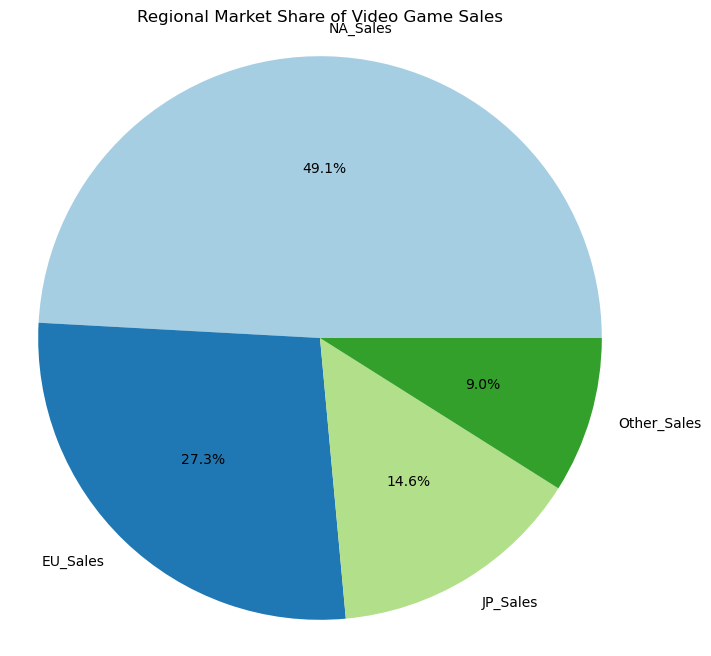

In [37]:
# Calculate the total global sales
total_global_sales = df['Global_Sales'].sum()

# Calculate the market share of each region
region_market_share = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() / total_global_sales * 100

# Create a pie chart to visualize the regional market share
plt.figure(figsize=(8, 8))
plt.pie(region_market_share, labels=region_market_share.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Regional Market Share of Video Game Sales')
plt.show()

15.Platform Sales Comparison: Compare the sales performance of different platforms side by side.

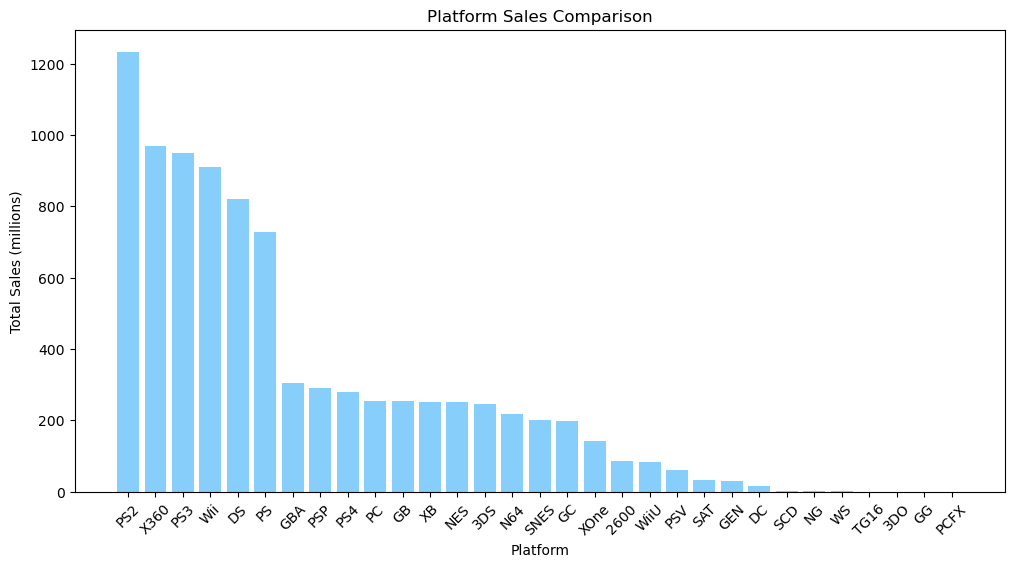

In [38]:
# Group the data by 'Platform' and calculate the sum of global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort the platforms based on total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

# Create a grouped bar chart to compare platform sales
plt.figure(figsize=(12, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'], color='lightskyblue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Platform Sales Comparison')
plt.xticks(rotation=45)
plt.show()

# Thank you